In [ ]:
h = 240
w = 270
# LOOK HERE adjust the height and width of the sliding window
# list of windows will be saved to img3
# annotations for this file will be saved to annotations
dir_name = f'img3-{h}-{w}/'

In [62]:
import os
files = os.listdir('img1/')
print(files)
index = input('enter the index of the file to process: ')
file_name = files[index]
print(file_name)

['PXD010357-lungcancer-19.png', 'PXD010357-lungcancer-20.png', 'B20190306xiangn_CRCD_DIA_b3_3.png', 'PXD004684-lungcancer-296-2.png', 'PXD010357-lungcancer-Huara.png', 'PXD006096-lungcancer-2.png', 'PXD006096-lungcancer-3.png', 'PXD006096-lungcancer-1.png']
B20190306xiangn_CRCD_DIA_b3_3.png


In [63]:
import numpy as np
import sys
!{sys.executable} -m pip install opencv-python
import cv2
import csv
file_path = 'img1/'+file_name
file_name = file_name.split('.')[0]
img = cv2.imread(file_path)
HEIGHT, WIDTH = img.shape[0], img.shape[1]
print(f'height:{HEIGHT}\twidth:{WIDTH}')
print('program starting...' + file_name)

You should consider upgrading via the '/Users/mac/Desktop/Research/venv/bin/Python -m pip install --upgrade pip' command.
height:16491	width:16940
program starting...B20190306xiangn_CRCD_DIA_b3_3


In [64]:
i = 0
# img = cv2.rectangle(img,(1,99),(100,199),(0,0,255))
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
while i + w < WIDTH:
    j = 0
    while j + h  < HEIGHT:
        temp = img[j:j+h, i:i+w]
        if not cv2.imwrite(f'{dir_name}/{file_name}_{int(i//w)}_{int(j//h)}{"" if (j/h)%1==0 else "+"}.jpg', temp):
            print(f'{dir_name}/{file_name}_{int(i//w)}_{int(j//h)}.jpg failed')
        j += int(h//2)
    i += w
print('finished saving frames')

finished saving frames


In [65]:
feature_bbox = np.load(f'misc/{file_name}_feature_bbox.npy')
# feature_bbox[0] = np.asarray([1,99,100,199])
arr = []
for box in feature_bbox:
        left, top, right, bot = box[0], box[1], box[2], box[3]
        if left//w == right//w and top//h == bot//h:
            i = int(left//w)
            j = int(bot//h)
            arr.append([f'{file_name}_{i}_{j}.jpg', w, h, 'feature' + str(int(box[4])), int(left%w), int(bot%h), int(right%w), int(top%h)])
        elif left//w == right//w:
            i = int(left//w)
            j = int(bot//h)
            while j<=int(top//h):
                if (int(bot//h)==j and (h-(bot%h)) <= h/5) or (int(top//h)==j and top%h <= h/5):
                    j+=1
                    continue
                arr.append([f'{file_name}_{i}_{j}.jpg', w, h, 'feature' + str(int(box[4])), int(left%w), int(bot%h) if int(bot//h)==j else 1, int(right%w), int(top%h) if int(top//h)==j else h-1])
                j+=1
        top -= int(h//2)
        bot -= int(h//2)
        if left//w == right//w and top//h == bot//h:
            i = int(left//w)
            j = int(bot//h)
            arr.append([f'{file_name}_{i}_{j}+.jpg', w, h, 'feature' + str(int(box[4])), int(left%w), int(bot%h), int(right%w), int(top%h)])
        elif left//w == right//w:
            i = int(left//w)
            j = int(bot//h)
            while j<=int(top//h):
                if (int(bot//h)==j and h-(bot%h) < h/5) or (int(top//h)==j and top%h < h/5):
                    j+=1
                    continue
                arr.append([f'{file_name}_{i}_{j}+.jpg', w, h, 'feature' + str(int(box[4])), int(left%w), int(bot%h) if int(bot//h)==j else 1, int(right%w), int(top%h) if int(top//h)==j else h-1])
                j+=1

arr.sort(key=lambda x:x[0])
with open(f'annotations/{file_name}_annotations.csv', mode='w') as file:
    writer = csv.writer(file, dialect='excel')
    writer.writerow(['filename','width','height','class','xmin','ymin','xmax','ymax'])
    writer.writerows(arr)
print(f'finished writing annotation file for {file_name}')

finished writing annotation file for B20190306xiangn_CRCD_DIA_b3_3


In [66]:
import os
file_names = [e[0] for e in arr]
tot = len(os.listdir(dir_name))
cnt = 0
for file in os.listdir(dir_name):
    if file_name not in file:
        continue
    if not file in file_names:
        cnt += 1
        os.remove(dir_name+file)
print(f'removed {cnt} empty sub-images out of all {tot} sub-images from {file_name}\n{tot-cnt} images remaining')


removed 7384 empty sub-images out of all 15131 sub-images from B20190306xiangn_CRCD_DIA_b3_3
7747 images remaining


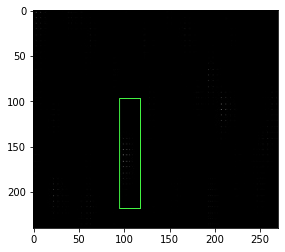

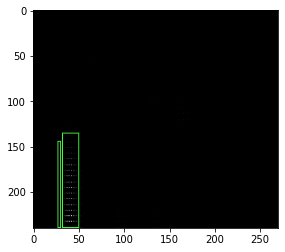

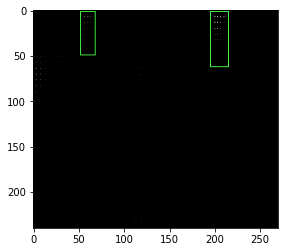

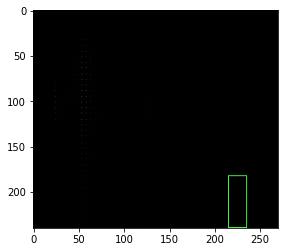

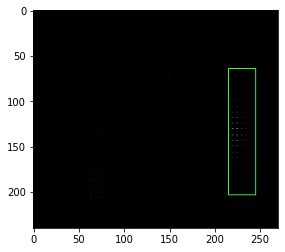

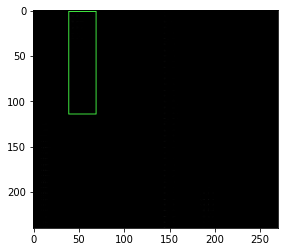

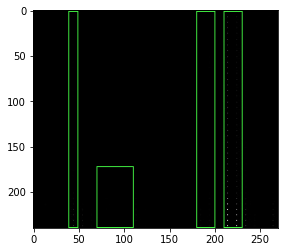

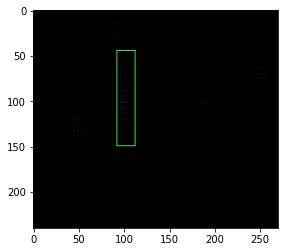

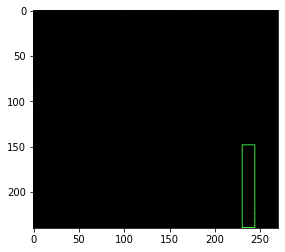

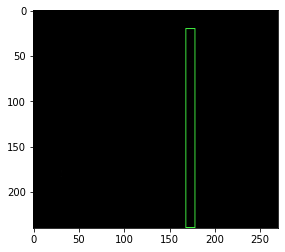

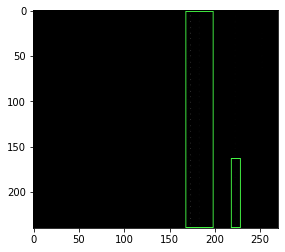

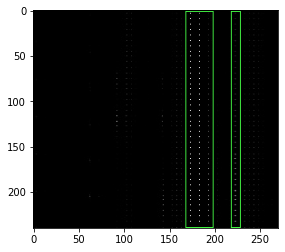

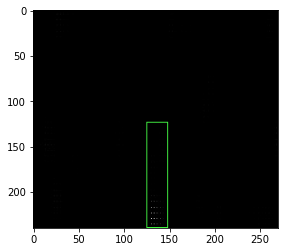

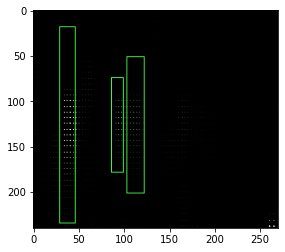

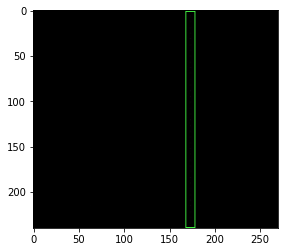

In [36]:
# optional cell to visualize the annotations
import os
import matplotlib.pyplot as plt
NUM_TO_SHOW = 15
for f in os.listdir(dir_name):
    if file_name.split('.')[0] not in f:
        continue
    NUM_TO_SHOW -= 1
    temp_file = dir_name + f
    train_img = cv2.imread(temp_file)
    bbox = [[e[4], e[5], e[6], e[7]] for e in arr if e[0] == f]
    for box in bbox:
        train_img = cv2.rectangle(train_img, (box[0], box[1]), (box[2], box[3]), (70, 255, 70), 1)
    plt.figure()
    plt.imshow(train_img, cmap='gray')
    if NUM_TO_SHOW == 0:
        break